<a href="https://colab.research.google.com/github/tsc86/Processamento-de-Linguagem-Natural---PLN/blob/main/A_12_13_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Rede Neural de Recorrência

## 1- Configuração do Colab

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2- Preparação dos dados

In [ ]:
textos_treinamento = [
  "eu gosto de programar em python",
  "python e uma linguagem poderosa",
  "programar é divertido com python",
  "aprenda python e seja feliz",
  "gosto de aprender coisas novas"
]

print(f"Textos de treinamento: {textos_treinamento}")

Textos de treinamento: ['eu gosto de programar em python', 'python e uma linguagem poderosa', 'programar é divertido com python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']


In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(textos_treinamento)

sequencias = tokenizer.texts_to_sequences(textos_treinamento)

print(f"\nVocabulario (palavra: indice): {tokenizer.word_index}")
print(f"Sequências numéricas dos textos: {sequencias}")

# +1 para incluir o 0 de padding
total_palavras = len(tokenizer.word_index) + 1
print (f"Tamanho total do vocabulario: {total_palavras}")


Vocabulario (palavra: indice): {'python': 1, 'gosto': 2, 'de': 3, 'programar': 4, 'e': 5, 'eu': 6, 'em': 7, 'uma': 8, 'linguagem': 9, 'poderosa': 10, 'é': 11, 'divertido': 12, 'com': 13, 'aprenda': 14, 'seja': 15, 'feliz': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequências numéricas dos textos: [[6, 2, 3, 4, 7, 1], [1, 5, 8, 9, 10], [4, 11, 12, 13, 1], [14, 1, 5, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulario: 20


In [ ]:
max_comprimento = max(len(seq) for seq in sequencias)
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

entradas_x = []
saidas_y = []

for seq in sequencias:
  for i in range(1, len(seq)):
    entradas_x.append(seq[:i])
    saidas_y.append(seq[i])

print(f"Exemplo de entradas_X (parcial): {entradas_x[0:5]}")
print(f"Exemplo de saidas_y (parcial): {saidas_y[0:5]}")

entradas_X_padded = pad_sequences(entradas_x, maxlen=max_comprimento -1, padding='pre')
saidas_y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_x padded (apos padding e truncagem): \n{entradas_X_padded[0:5]}")
print(f"Exemplo de saidas_y_one_hot (apos one-hot encoding): \n{saidas_y_one_hot[0:5]}")
print(f"Formato final das entradas (X): {entradas_X_padded.shape}")
print(f"Formato final das saidas (y): {saidas_y_one_hot. shape}")



Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_X (parcial): [[6], [6, 2], [6, 2, 3], [6, 2, 3, 4], [6, 2, 3, 4, 7]]
Exemplo de saidas_y (parcial): [2, 3, 4, 7, 1]

Exemplo de entradas_x padded (apos padding e truncagem): 
[[0 0 0 0 6]
 [0 0 0 6 2]
 [0 0 6 2 3]
 [0 6 2 3 4]
 [6 2 3 4 7]]
Exemplo de saidas_y_one_hot (apos one-hot encoding): 
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Formato final das entradas (X): (21, 5)
Formato final das saidas (y): (21, 20)


In [ ]:
max_comprimento = max(len(seq) for seq in sequencias)
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

entradas_x = []
saidas_y = []

for seq in sequencias:
  for i in range(1, len(seq)):
    entradas_x.append(seq[:i])
    saidas_y.append(seq[i])

print(f"Exemplo de entradas_X (parcial): {entradas_x[0:5]}")
print(f"Exemplo de saidas_y (parcial): {saidas_y[0:5]}")

entradas_X_padded = pad_sequences(entradas_x, maxlen=max_comprimento -1, padding='pre')
saidas_y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_x padded (apos padding e truncagem): \n{entradas_X_padded[0:5]}")
print(f"Exemplo de saidas_y_one_hot (apos one-hot encoding): \n{saidas_y_one_hot[0:5]}")
print(f"Formato final das entradas (X): {entradas_X_padded.shape}")
print(f"Formato final das saidas (y): {saidas_y_one_hot. shape}")


Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_X (parcial): [[6], [6, 2], [6, 2, 3], [6, 2, 3, 4], [6, 2, 3, 4, 7]]
Exemplo de saidas_y (parcial): [2, 3, 4, 7, 1]

Exemplo de entradas_x padded (apos padding e truncagem): 
[[0 0 0 0 6]
 [0 0 0 6 2]
 [0 0 6 2 3]
 [0 6 2 3 4]
 [6 2 3 4 7]]
Exemplo de saidas_y_one_hot (apos one-hot encoding): 
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Formato final das entradas (X): (21, 5)
Formato final das saidas (y): (21, 20)


## 3- Construção do RNN

In [ ]:
modelo_rnn = Sequential()

modelo_rnn.add(Embedding(total_palavras, 10, input_length=entradas_X_padded.shape[1]))
modelo_rnn.add(SimpleRNN(32))
modelo_rnn.add(Dense(total_palavras, activation='softmax' ))

modelo_rnn. compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo_rnn.summary ()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4- Treinamento do modelo

In [ ]:
print("\nIniciando o treinamento do modelo RNN ... ")
modelo_rnn.fit(entradas_X_padded, saidas_y_one_hot, epochs=100, verbose=1)
print("Treinamento concluído!")


Iniciando o treinamento do modelo RNN ... 
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1429 - loss: 2.9845
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1429 - loss: 2.9748
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1905 - loss: 2.9650
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1905 - loss: 2.9550
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2381 - loss: 2.9448
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2857 - loss: 2.9343
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2857 - loss: 2.9235
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2857 - loss: 2.9125
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2857 - loss: 2.9011
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2857 - loss: 2.8893
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2857 - loss: 2.8772
Epoch 12/100
1/1 ━━━━━━━━━━━━━━

## 5- Modelo de previsão

In [ ]:
def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
  sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]

  sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='pre')
  previsao_probabilidades = modelo.predict(sequencia_padded, verbose=0)[0]

  indice_palavra_prevista = np.argmax(previsao_probabilidades)

  for palavra, indice in tokenizer.word_index.items():
    if indice == indice_palavra_prevista:
      return palavra

  return None


comprimento_entrada_modelo = entradas_X_padded. shape[1]

print("\n --- Testando o Modelo RNN --- ")

texto_teste_1 = "eu gosto de"
proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)
print(f"Texto: '{texto_teste_1}' -> Proxima palavra prevista: '{proxima_1}'")

texto_teste_2 = "python é uma"
proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)
print(f"Texto: '{texto_teste_2}' -> Proxima palavra prevista: '{proxima_2}'")

texto_teste_3 = "programar é divertido"
proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)
print(f"Texto: '{texto_teste_3}' -> Proxima palavra prevista: '{proxima_3}'")

texto_teste_4 = "aprenda python e"
proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)
print(f"Texto: '{texto_teste_4}' -> Proxima palavra prevista: '{proxima_4}'")

texto_teste_5 = "o sol brilha no" # "sol" e "brilha" NÃO estão no vocábulario
proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)
print(f"Texto: '{texto_teste_5}' -> Proxima palavra prevista: '{proxima_5}' (Pode ser inesperada devido a palavras desconhecidas)")



 --- Testando o Modelo RNN --- 
Texto: 'eu gosto de' -> Proxima palavra prevista: 'programar'
Texto: 'python é uma' -> Proxima palavra prevista: 'linguagem'
Texto: 'programar é divertido' -> Proxima palavra prevista: 'com'
Texto: 'aprenda python e' -> Proxima palavra prevista: 'seja'
Texto: 'o sol brilha no' -> Proxima palavra prevista: 'python' (Pode ser inesperada devido a palavras desconhecidas)


# Modelo de Rede Neural Rede Long Short-Term Memory

## 1- Configuração e import de bibliotecas

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras. preprocessing. sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2- Preparação e análise de sentimentos

In [ ]:
dados_sentimento = [
  ("este filme é ótimo e divertido", "positivo"),
  ("eu adorei o livro, muito bom", "positivo"),
  ("gostei muito da atuação dos atores", "positivo"),
  ("o roteiro é fraco e chato", "negativo"),
  ("não recomendo este péssimo produto", "negativo"),
  ("uma perda de tempo horrivel", "negativo"),
  ("otimo trabalho, parabens", "positivo"),
  ("terrível experiência, nunca mais", "negativo"),
  ("excelente serviço, muito eficiente", "positivo"),
  ("que decepção, muito ruim", "negativo"),
  ("aprendizagem de máquina é fascinante", "positivo"),
  ("pln é um campo interessante", "positivo"),
  ("este software travou várias vezes", "negativo"),
  ("a interface é confusa e difícil", "negativo"),
  ("o aplicativo é super útil e rápido", "positivo"),
]

textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]

print(f"Total de frases: {len(textos)}")
print(f"Exemplo de textos: {textos[:3]}")
print(f"Exemplo de sentimentos: {sentimentos[:3]}")

Total de frases: 15
Exemplo de textos: ['este filme é ótimo e divertido', 'eu adorei o livro, muito bom', 'gostei muito da atuação dos atores']
Exemplo de sentimentos: ['positivo', 'positivo', 'positivo']


In [ ]:
#Mapear Sentimentos
mapeamento_sentimento = {'negativo': 0, 'positivo': 1}
rotulos_numericos = np.array([mapeamento_sentimento[s] for s in sentimentos])

print(f"\nSentimentos mapeados para números: {rotulos_numericos}")

tokenizer = Tokenizer(num_words=None, oov_token="")

tokenizer.fit_on_texts(textos)
sequencias_numericas = tokenizer.texts_to_sequences(textos)

total_palavras_vocab = len(tokenizer.word_index) + 1 # +1 para o 0 de padding/oov

print(f"\nvocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas das frases: {sequencias_numericas}")
print(f"Tamanho total do vocabulario: {total_palavras_vocab}")

#Encontrar o comprimento da frase mais longa para padronizar
max_len = max(len(s) for s in sequencias_numericas)
print(f"\nComprimento máximo das sequências: {max_len}")

sequencias_padded = pad_sequences(sequencias_numericas, maxlen=max_len, padding='post') # 'post' para adicionar zeros no final
print(f"Sequências apos padding: \n{sequencias_padded}")

#Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
  sequencias_padded, rotulos_numericos, test_size=0.2, random_state=42, stratify=rotulos_numericos
)

print(f"\nShape de x_treino: {X_treino.shape}")
print(f"Shape de X_teste: {X_teste.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de y_teste: {y_teste.shape}")


Sentimentos mapeados para números: [1 1 1 0 0 0 1 0 1 0 1 1 0 0 1]

vocabulário (palavra: índice): {'': 1, 'é': 2, 'e': 3, 'muito': 4, 'este': 5, 'o': 6, 'de': 7, 'filme': 8, 'ótimo': 9, 'divertido': 10, 'eu': 11, 'adorei': 12, 'livro': 13, 'bom': 14, 'gostei': 15, 'da': 16, 'atuação': 17, 'dos': 18, 'atores': 19, 'roteiro': 20, 'fraco': 21, 'chato': 22, 'não': 23, 'recomendo': 24, 'péssimo': 25, 'produto': 26, 'uma': 27, 'perda': 28, 'tempo': 29, 'horrivel': 30, 'otimo': 31, 'trabalho': 32, 'parabens': 33, 'terrível': 34, 'experiência': 35, 'nunca': 36, 'mais': 37, 'excelente': 38, 'serviço': 39, 'eficiente': 40, 'que': 41, 'decepção': 42, 'ruim': 43, 'aprendizagem': 44, 'máquina': 45, 'fascinante': 46, 'pln': 47, 'um': 48, 'campo': 49, 'interessante': 50, 'software': 51, 'travou': 52, 'várias': 53, 'vezes': 54, 'a': 55, 'interface': 56, 'confusa': 57, 'difícil': 58, 'aplicativo': 59, 'super': 60, 'útil': 61, 'rápido': 62}
Sequências numéricas das frases: [[5, 8, 2, 9, 3, 10], [11, 1

## 3- Construção do LSTM

In [ ]:
modelo_lstm = Sequential()

modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_len))

#Camada LSTM:
modelo_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

modelo_lstm.add(Dense(1, activation='sigmoid'))

modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelo_lstm. summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4- Treinamento e avaliação


Iniciando o treinamento do modelo LSTM ... 
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 4.9814e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.5918
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 4.6069e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.6142
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 4.2752e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.6344
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 5.0372e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.6568
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 5.9499e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.6803
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 4.8877e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.7022
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 4.3459e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.7187
Epoch 8/50
5/5 ━━━━━━━━━

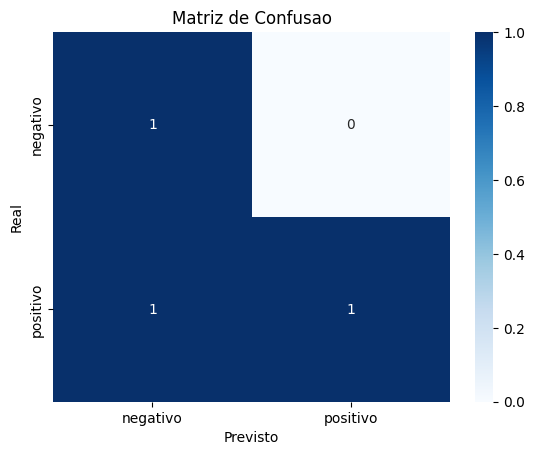

In [ ]:
print("\nIniciando o treinamento do modelo LSTM ... ")

historico = modelo_lstm.fit(
  X_treino, y_treino,
  epochs=50,
  batch_size=2,
  validation_split=0.1,
  verbose=1
)

#epochs: número de vezes que o modelo verá todo o conjunto de dados de treinamento.
#batch_size: número de amostras por atualização de gradiente.
#validation_split: % dos dados de treino usados para validacao durante o treinamento (opcional, mas bom para monitorar overfitting)

print("Treinamento concluido!")

perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)
print(f"\nAcuracia do modelo no conjunto de teste: {acuracia*100:.2f}%")
print(f"Perda do modelo no conjunto de teste: {perda:.4f}")

y_pred_prob = modelo_lstm.predict(X_teste)
y_pred_classes = (y_pred_prob > 0.5).astype(int) #Converter probabilidades para 0 ou 1

print("\n --- Relatório de Classificação --- ")
print(classification_report(y_teste, y_pred_classes, target_names=['negativo', 'positivo' ]))

print("\n --- Matriz de Confusão --- ")
cm = confusion_matrix(y_teste, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negativo', 'positivo' ], yticklabels=['negativo', 'positivo' ])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusao')
plt.show()

## 5- Testando o modelo com novas frases

In [ ]:
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
  sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

  if not sequencia_numerica:
    print(f"Aviso: A frase '{frase_nova}' contem apenas palavras desconhecidas.")
    return "Desconhecido"

  sequencia_numerica = sequencia_numerica[0]

  sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='post')

  probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0)[0][0]

  mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

  #Classificar com base no limiar de 0.5
  if probabilidade_positiva >= 0.5:
    return mapeamento_inverso[1] # 'positivo'
  else:
    return mapeamento_inverso[0] # 'negativo'

print("\n --- Testando o Modelo LSTM com Novas Frases --- ")

frase_nova_1 = "gostei muito do filme, excelente!"
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_1, mapeamento_sentimento)
print(f"Frase: '{frase_nova_1}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_2 = "odiei o livro, muito entediante"
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_2, mapeamento_sentimento)
print(f"Frase: '{frase_nova_2}' -> Sentimento previsto: ' {sentimento_2}'")

frase_nova_3 = "a aula de pln é ótima"
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_3, mapeamento_sentimento)
print(f"Frase: '{frase_nova_3}' -> Sentimento previsto: '{sentimento_3}'")

frase_nova_4 = "o atendimento foi péssimo"
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_4, mapeamento_sentimento)
print(f"Frase: '{frase_nova_4}' -> Sentimento previsto: '{sentimento_4}'")

frase_nova_5 = "esse produto não vale a pena, é caro"
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_5, mapeamento_sentimento)
print(f"Frase: '{frase_nova_5}' -> Sentimento previsto: '{sentimento_5}'")

frase_nova_6 = "o filme é legal" #Frase curta e ambígua para um modelo pequeno
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_6, mapeamento_sentimento)
print(f"Frase: '{frase_nova_6}' -> Sentimento previsto: ' {sentimento_6}'")

frase_nova_7 = "isso é horrível, que tristeza"
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_7, mapeamento_sentimento)
print(f"Frase: '{frase_nova_7}' -> Sentimento previsto: '{sentimento_7}'")



 --- Testando o Modelo LSTM com Novas Frases --- 
Frase: 'gostei muito do filme, excelente!' -> Sentimento previsto: 'positivo'
Frase: 'odiei o livro, muito entediante' -> Sentimento previsto: ' positivo'
Frase: 'a aula de pln é ótima' -> Sentimento previsto: 'negativo'
Frase: 'o atendimento foi péssimo' -> Sentimento previsto: 'negativo'
Frase: 'esse produto não vale a pena, é caro' -> Sentimento previsto: 'negativo'
Frase: 'o filme é legal' -> Sentimento previsto: ' negativo'
Frase: 'isso é horrível, que tristeza' -> Sentimento previsto: 'negativo'
